In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Correlation Check

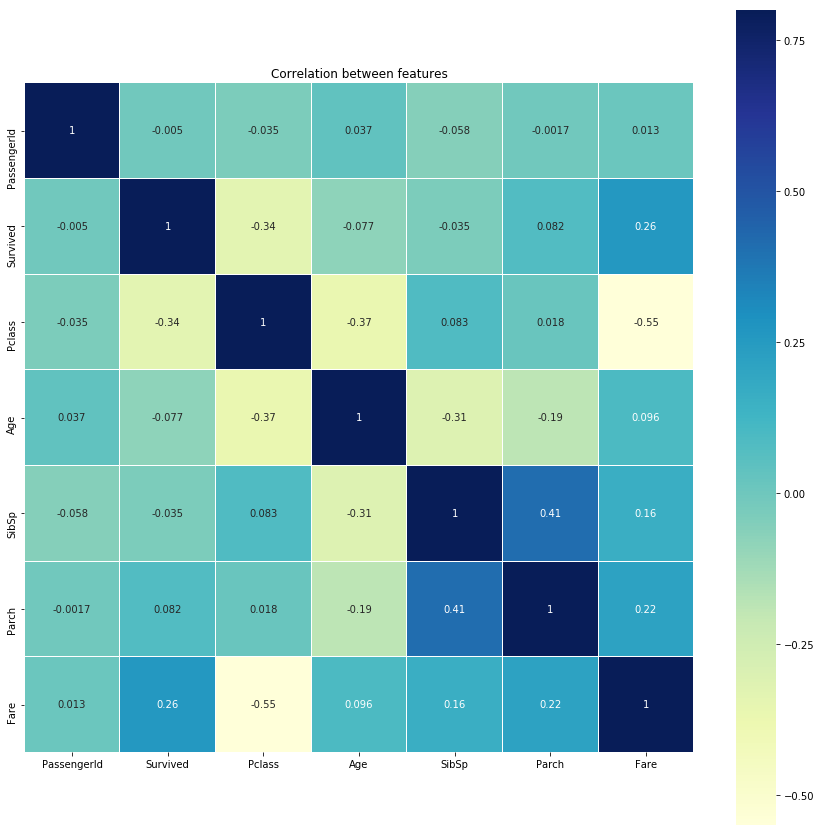

In [3]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax= 0.8, linewidths=0.01, square=True, annot= True, cmap='YlGnBu', linecolor='white')
plt.title('Correlation between features');

In [4]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

## Feature Engineering

### Where were passenger on the ship?

In [5]:
df['Deck'] = df['Cabin'].str[0]
df_test['Deck'] = df_test['Cabin'].str[0]
df['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

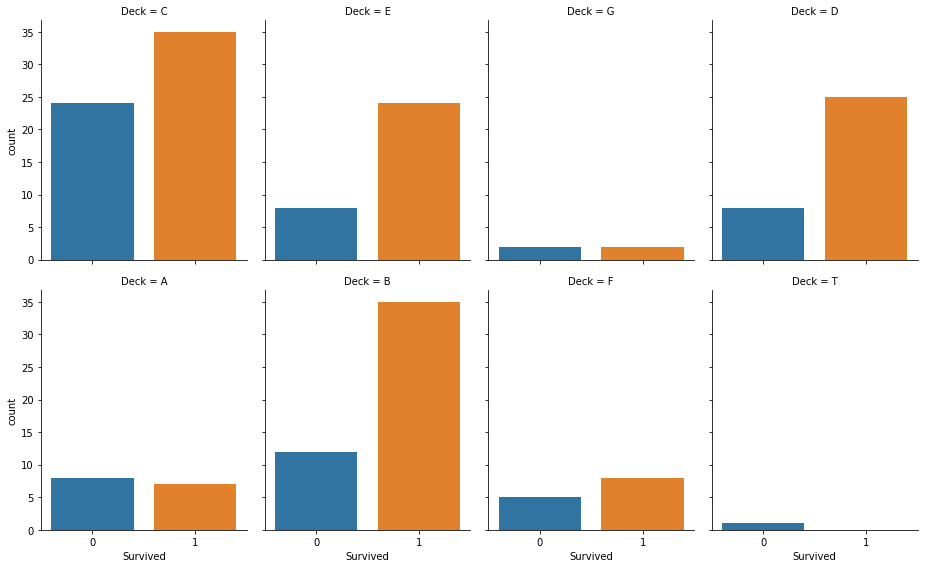

In [6]:
sns.factorplot('Survived', col='Deck', col_wrap=4, data=df[df.Deck.notnull()], kind="count", aspect=0.8)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


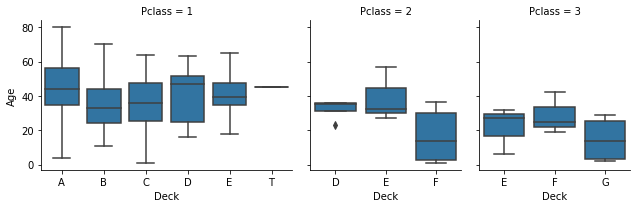

In [7]:
df = df.sort_values(by='Deck')
g = sns.FacetGrid(df, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Deck", "Age");

In [8]:
# Fill nan with Z value
df.Deck.fillna('Z', inplace=True)
df_test.Deck.fillna('Z', inplace=True)
df['Deck'].unique()


array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

In [9]:
df_test['Deck'].unique()

array(['Z', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

### How big is your family?

In [10]:
#Family size = parents/children + siblings / spouses + passengers themselves
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
print(df['FamilySize'].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [11]:
df.loc[df["FamilySize"] == 1, "Fsize"] = 'single'
df.loc[(df["FamilySize"] > 1)  &  (df["FamilySize"] < 5) , "Fsize"] = 'small'
df.loc[df["FamilySize"] >4, "Fsize"] = 'large'

df_test.loc[df_test["FamilySize"] == 1, "Fsize"] = 'single'
df_test.loc[(df_test["FamilySize"] >1) & (df_test["FamilySize"] <5) , "Fsize"] = 'small'
df_test.loc[df_test["FamilySize"] >4, "Fsize"] = 'large'

In [12]:
print(df["Fsize"].unique())
print(df["Fsize"].value_counts())

['single' 'small' 'large']
single    537
small     292
large      62
Name: Fsize, dtype: int64


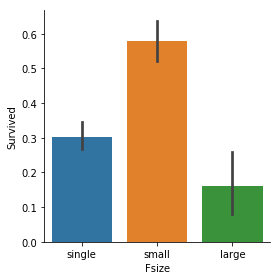

In [13]:
sns.factorplot(data=df, x="Fsize", y="Survived", kind="bar")

### What is your title?

In [14]:
import re

#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = df["Name"].apply(get_title)

In [15]:
df['Title'] = titles
                


In [16]:
df['Title'].unique()

array(['Mr', 'Master', 'Col', 'Sir', 'Lady', 'Mrs', 'Miss', 'Major',
       'Mlle', 'Dr', 'Mme', 'Countess', 'Capt', 'Don', 'Rev', 'Ms',
       'Jonkheer'], dtype=object)

In [17]:
df.loc[df["Title"] == "Mlle", "Title"] = 'Miss'
df.loc[df["Title"] == "Ms", "Title"] = 'Miss'
df.loc[df["Title"] == "Mme", "Title"] = 'Mrs'
df.loc[df["Title"] == "Dona", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Lady", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Countess", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Capt", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Col", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Don", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Major", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Rev", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Sir", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Jonkheer", "Title"] = 'Rare Title'
df.loc[df["Title"] == "Dr", "Title"] = 'Rare Title'


In [18]:
df['Title'].unique()

array(['Mr', 'Master', 'Rare Title', 'Mrs', 'Miss'], dtype=object)

In [19]:
test_titles = df_test["Name"].apply(get_title)
df_test['Title'] = test_titles

In [20]:
df_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [21]:
df_test.loc[df_test["Title"] == "Ms", "Title"] = 'Miss'
df_test.loc[df_test["Title"] == "Dona", "Title"] = 'Rare Title'
df_test.loc[df_test["Title"] == "Col", "Title"] = 'Rare Title'
df_test.loc[df_test["Title"] == "Don", "Title"] = 'Rare Title'
df_test.loc[df_test["Title"] == "Major", "Title"] = 'Rare Title'
df_test.loc[df_test["Title"] == "Rev", "Title"] = 'Rare Title'
df_test.loc[df_test["Title"] == "Sir", "Title"] = 'Rare Title'
df_test.loc[df_test["Title"] == "Jonkheer", "Title"] = 'Rare Title'
df_test.loc[df_test["Title"] == "Dr", "Title"] = 'Rare Title'

In [22]:
df_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

In [23]:
df['Title'].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: Title, dtype: int64

In [24]:
df_test['Title'].value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

## Correlation check 2

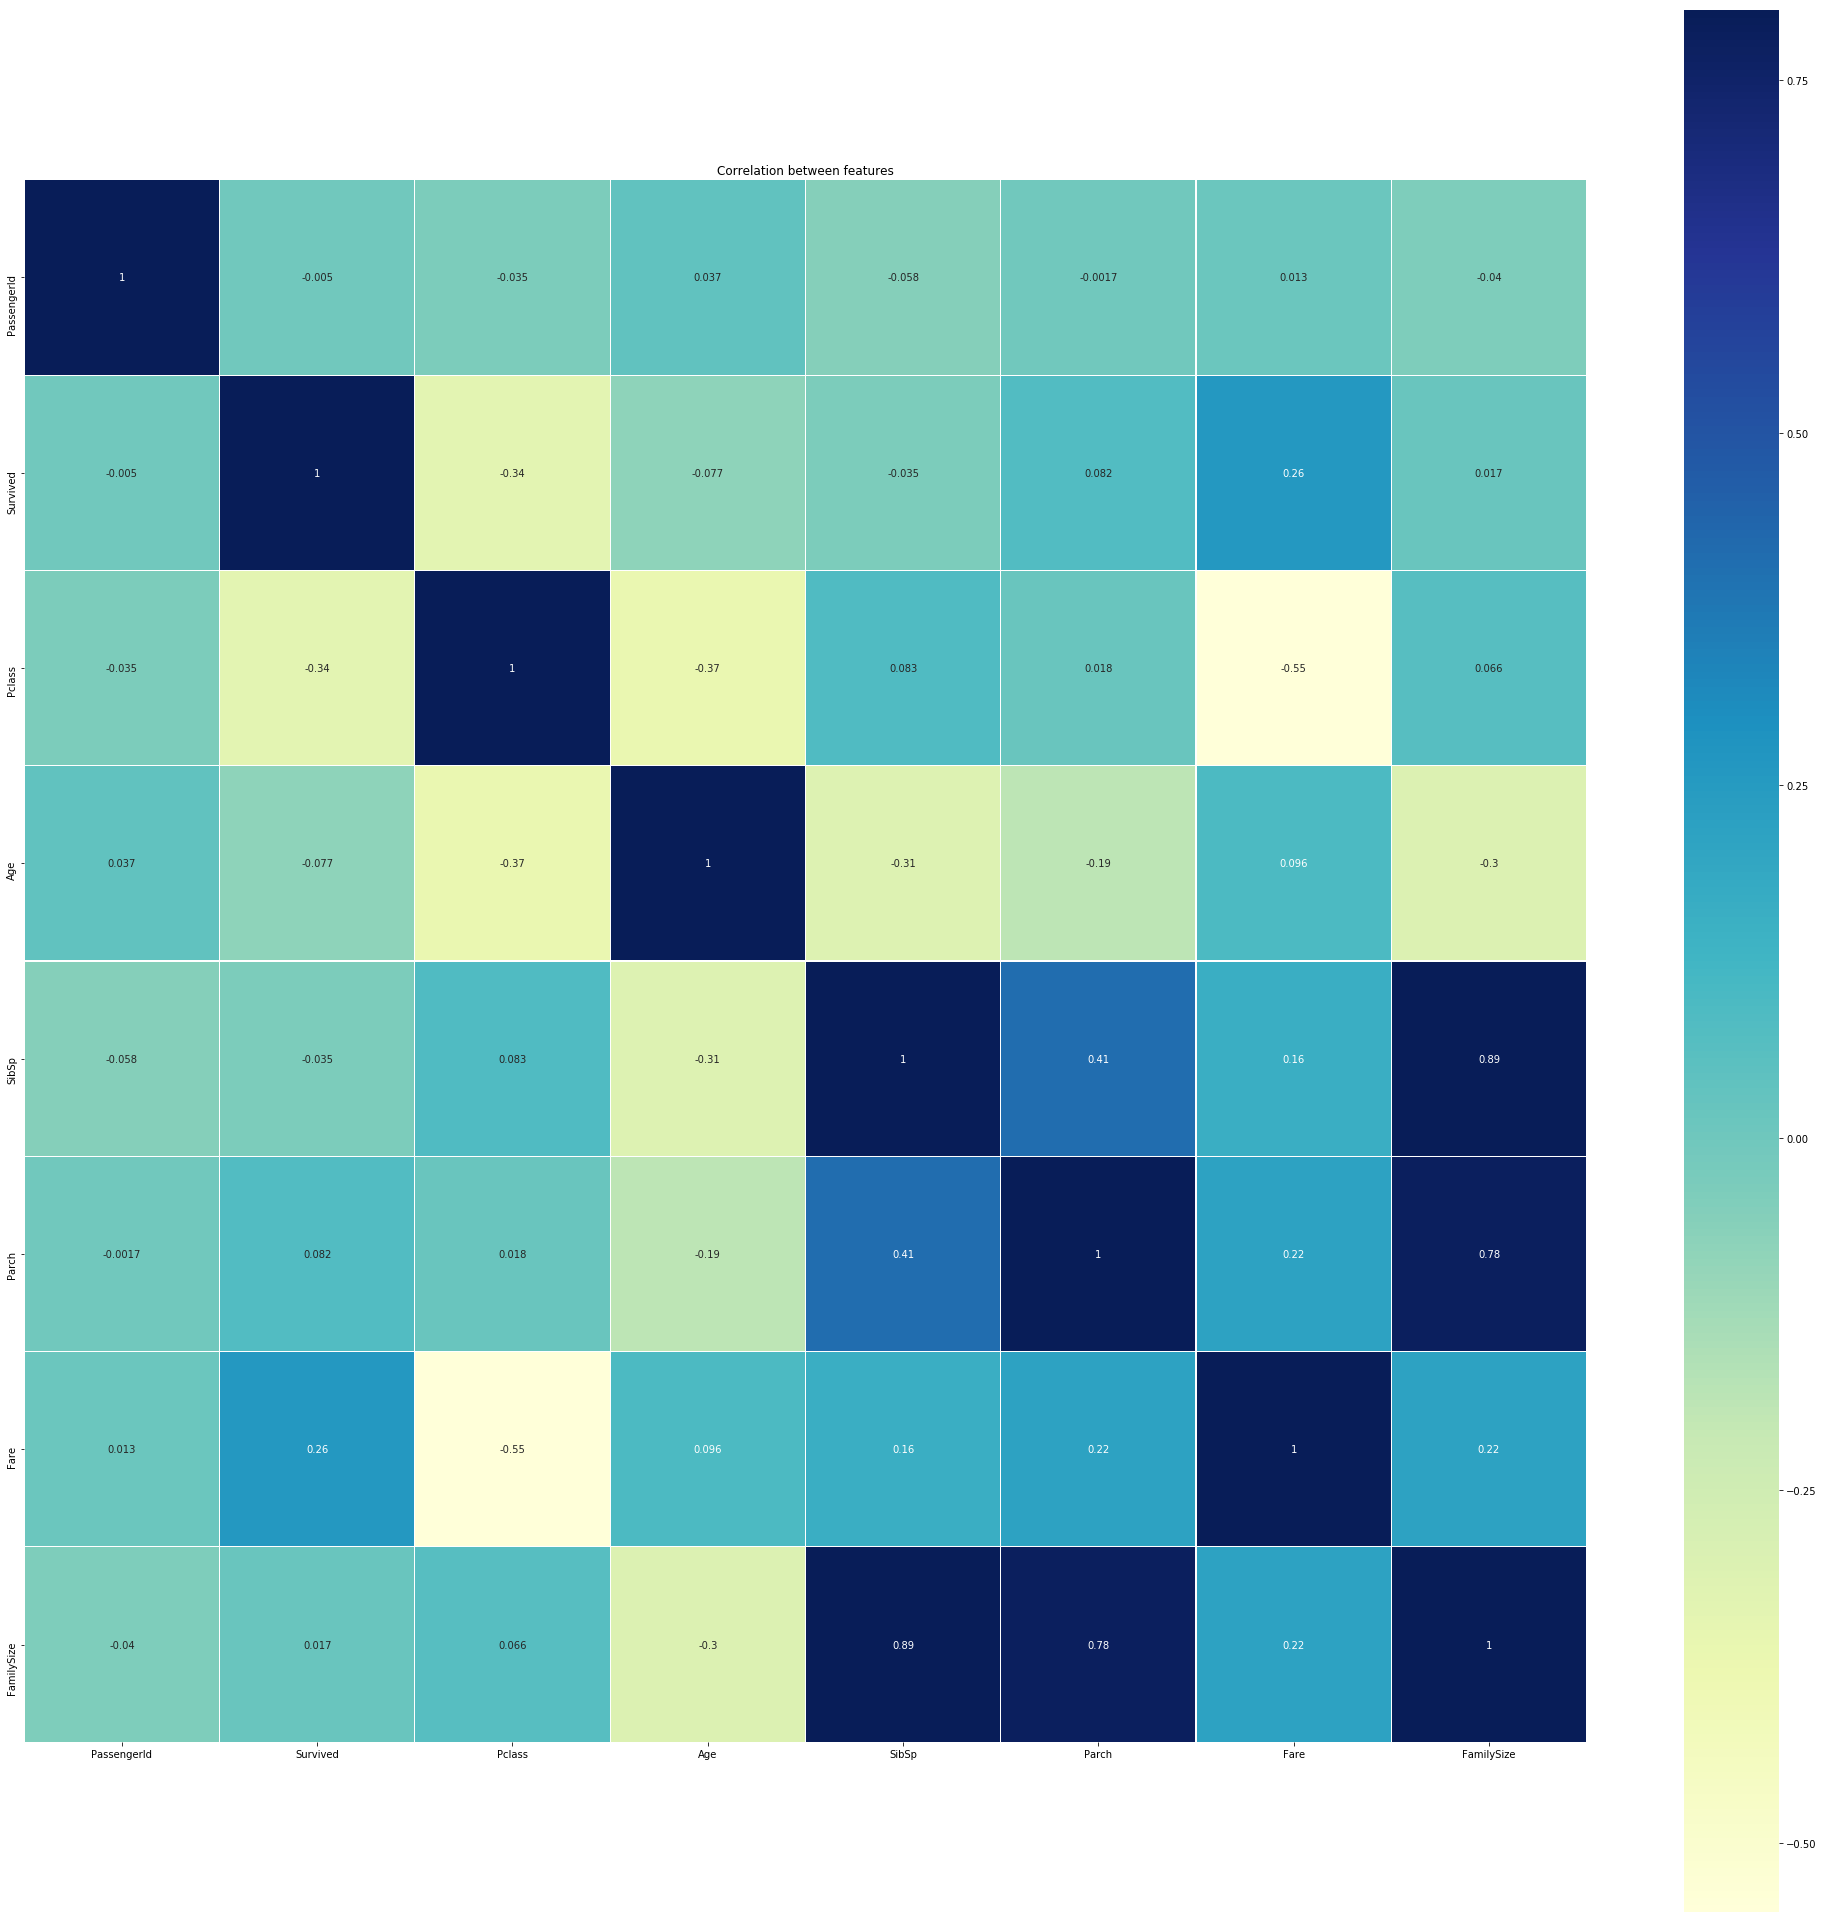

In [25]:
corr = df.corr()
plt.figure(figsize=(35,35))
sns.heatmap(corr, vmax= 0.8, linewidths=0.01, square=True, annot= True, cmap='YlGnBu', linecolor='white')
plt.title('Correlation between features');

In [26]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


## Fill missing value

### Check missing value

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 475 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Deck           891 non-null object
FamilySize     891 non-null int64
Fsize          891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 158.3+ KB


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Deck           418 non-null object
FamilySize     418 non-null int64
Fsize          418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 49.1+ KB


### Filling missing value ar Embark column

In [29]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,Fsize,Title
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,1,single,Mrs
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,1,single,Miss


In [30]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [31]:
df.loc[df['PassengerId'] == 61]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,Fsize,Title
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Z,1,single,Mr


In [32]:
df.loc[df['PassengerId'] == 830]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,Fsize,Title
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,B,1,single,Mrs


### Fill miss value at Fare column

In [33]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,Fsize,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Z,1,single,Mr


In [34]:
#we can replace missing value in fare by taking median of all fares of those passengers 
#who share 3rd Passenger class and Embarked from 'S' 
median_fare=df_test[(df_test['Pclass'] == 3) & (df_test['Embarked'] == 'S')]['Fare'].median()
print(median_fare)
df_test["Fare"] = df_test["Fare"].fillna(median_fare)

8.05


In [35]:
df_test.loc[df_test['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,Fsize,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S,Z,1,single,Mr


### Fill missing value at Age column

Age seems to be promising feature. So it doesnt make sense to simply fill null values out with median/mean/mode.

We will use Random Forest algorithm to predict ages

In [36]:
# Convert Categorical variable into Numerical ones

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex','Title','Fsize','Deck']
for col in cat_vars:
    df[col]=labelEnc.fit_transform(df[col])
    df_test[col]=labelEnc.fit_transform(df_test[col])


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(15, 100)

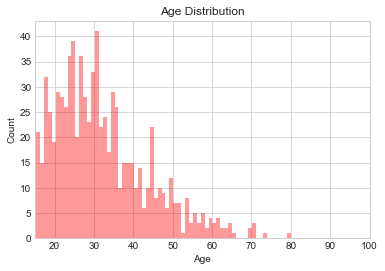

In [42]:
sns.set_style("whitegrid")
sns.distplot(df["Age"], bins=80, kde=False, color="red")
plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlim((15,100))

In [38]:
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp', 'Title','Pclass','FamilySize','Fsize','Deck']]
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

df_fill_missing_age=fill_missing_age(df)
df_test_fill_missing=fill_missing_age(df_test)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(15, 100)

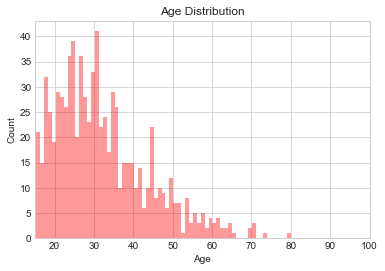

In [40]:
sns.set_style("whitegrid")
sns.distplot(df["Age"], bins=80, kde=False, color="red")
plt.title("Age Distribution")
plt.ylabel("Count")
plt.xlim((15,100))